# 0. Importação dos dados



In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
def importar_dados():

    lista = []

    for i in range(4):
        url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_{i+1}.csv"

        df = pd.read_csv(url)
        loja = (f"loja_{i+1}", df)

        lista.append(loja)

    return lista


def exibir_dados(df: pd.DataFrame):
    df.head()

dados_lojas = importar_dados()
loja_str, loja_df = dados_lojas[0]

loja_df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [72]:
def calcular_faturamento(lista_lojas: list):

    lista_faturamentos = []

    for loja in lista_lojas:
        loja_str, loja_df = loja

        lista_de_vendas = list(loja_df['Preço'])
        faturamento = sum(lista_de_vendas)

        lista_faturamentos.append((loja_str, faturamento))

    return lista_faturamentos


faturamentos = calcular_faturamento(lista_lojas=dados_lojas)
print(faturamentos)


[('loja_1', 1534509.12), ('loja_2', 1488459.06), ('loja_3', 1464025.03), ('loja_4', 1384497.58)]


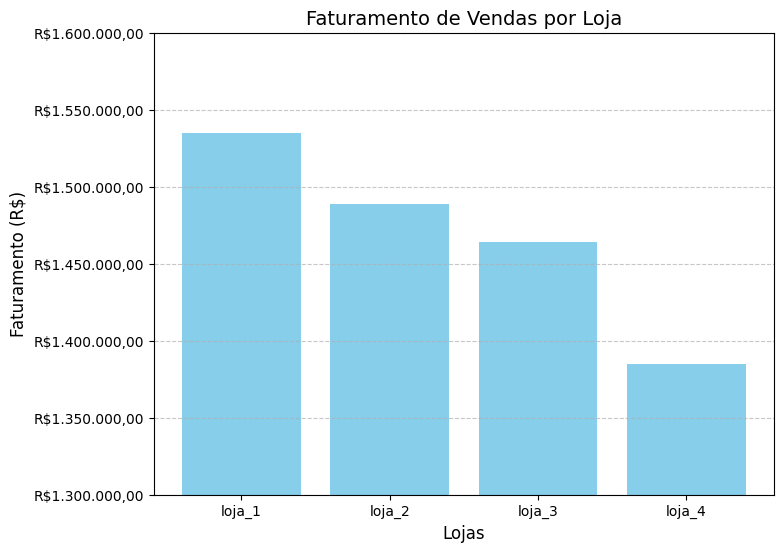

In [73]:
from matplotlib.ticker import FuncFormatter

def formatar_valores(valor, pos):
    return f'R${valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

formatter = FuncFormatter(formatar_valores)

plt.figure(figsize=(8, 6))
plt.bar(nomes_lojas, valores_faturamento, color='skyblue')
plt.title('Faturamento de Vendas por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(1300000, 1600000)  
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Vendas por Categoria


In [74]:
def categorias(df: pd.DataFrame):

    return set(df['Categoria do Produto'])


def vendas_por_categoria(lista_lojas: list):

    lista_vendas_por_categoria = []

    for loja in lista_lojas:
        loja_str, loja_df = loja

        lista_vendas = list(loja_df['Categoria do Produto'])
        
        loja_dict = {
            loja_str: {

            }
        }

        for categoria in categorias(loja_df):
            qtd_de_vendas = lista_vendas.count(categoria)

            loja_dict[loja_str].update({categoria: qtd_de_vendas})

        
        lista_vendas_por_categoria.append(loja_dict)

    return lista_vendas_por_categoria

lista_de_vendas = vendas_por_categoria(dados_lojas)
print(lista_de_vendas)

[{'loja_1': {'livros': 173, 'moveis': 465, 'brinquedos': 324, 'eletronicos': 448, 'instrumentos musicais': 182, 'esporte e lazer': 284, 'utilidades domesticas': 171, 'eletrodomesticos': 312}}, {'loja_2': {'livros': 197, 'moveis': 442, 'brinquedos': 313, 'eletronicos': 422, 'instrumentos musicais': 224, 'esporte e lazer': 275, 'utilidades domesticas': 181, 'eletrodomesticos': 305}}, {'loja_3': {'livros': 185, 'moveis': 499, 'brinquedos': 315, 'eletronicos': 451, 'instrumentos musicais': 177, 'esporte e lazer': 277, 'utilidades domesticas': 177, 'eletrodomesticos': 278}}, {'loja_4': {'moveis': 480, 'brinquedos': 338, 'eletronicos': 451, 'instrumentos musicais': 170, 'esporte e lazer': 277, 'utilidades domesticas': 201, 'eletrodomesticos': 254, 'livros': 187}}]


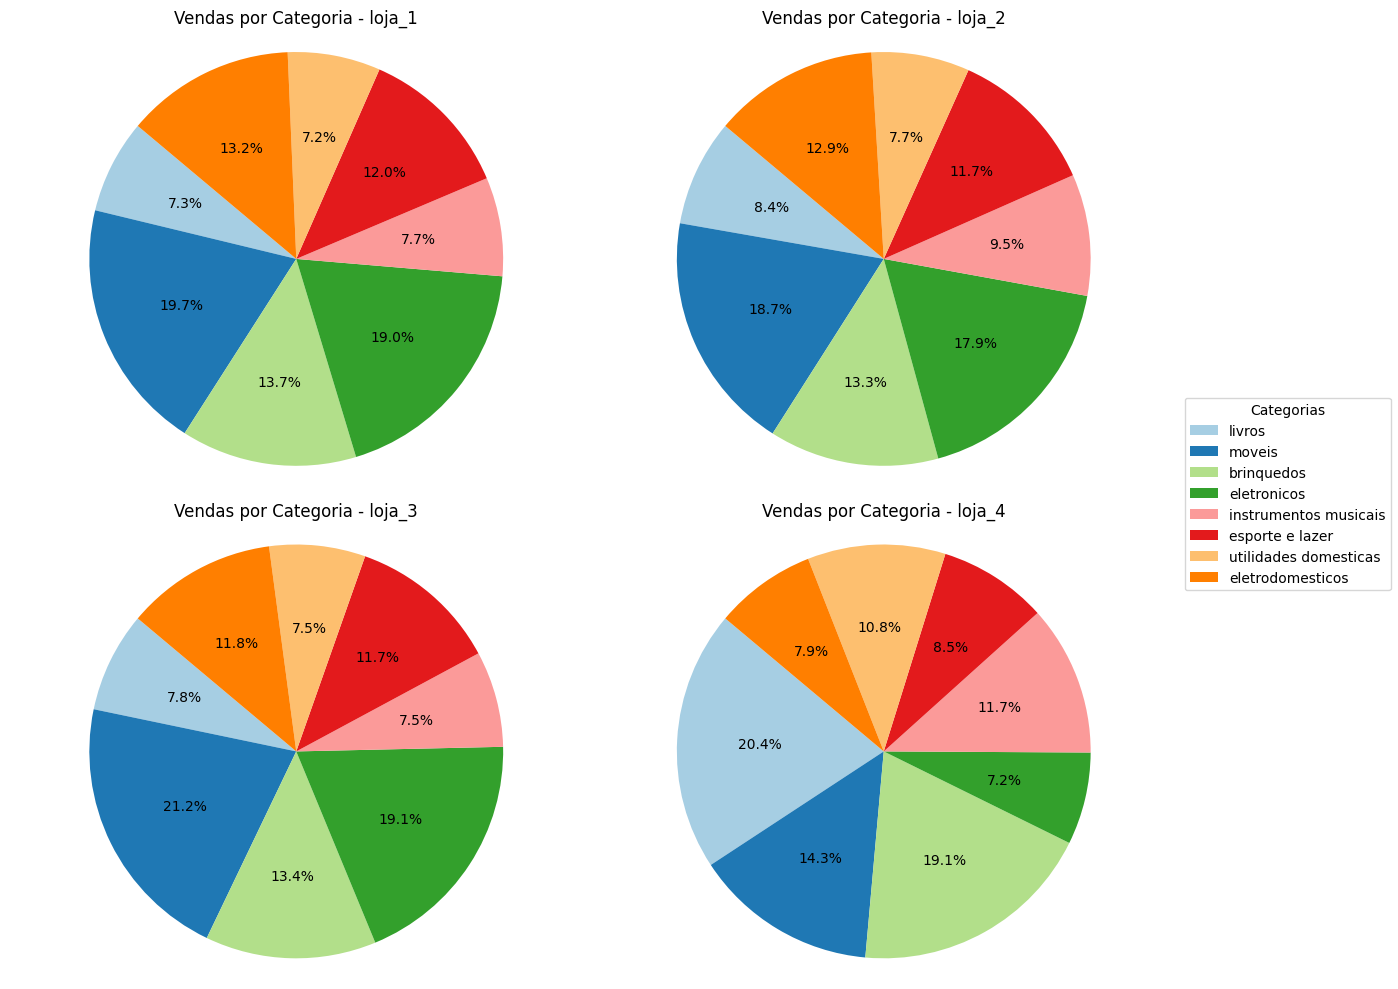

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorias_nomes = categorias(dados_lojas[0][1])

for i, loja in enumerate(lista_de_vendas):
    for loja_nome, categorias in loja.items():
        vendas = list(categorias.values())
        
        ax = axes[i // 2, i % 2]
        wedges, texts, autotexts = ax.pie(vendas, 
                                          labels=None, autopct='%1.1f%%', 
                                          startangle=140, colors=plt.cm.Paired.colors
                                        )
        
        ax.set_title(f'Vendas por Categoria - {loja_nome}', fontsize=12)
        ax.axis('equal')  

fig.legend(wedges, categorias_nomes, loc='center right', fontsize=10, title="Categorias")
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

# 3. Média de Avaliação das Lojas

In [76]:
def media_avaliacoes(df: pd.DataFrame):
    
    avaliacoes = list(df['Avaliação da compra'])
    media =sum(avaliacoes) / len(avaliacoes)

    return round(media, 2)
    

def avaliacao_das_lojas(lista: list):

    lista_avaliacoes = []
    
    for loja in lista:
        loja_str, loja_df = loja

        media_avaliacao = media_avaliacoes(loja_df)

        loja_dict = {
            'loja': loja_str,
            'media': media_avaliacao 
        }

        lista_avaliacoes.append(loja_dict)

    return lista_avaliacoes

lista_avaliacoes = avaliacao_das_lojas(dados_lojas)
print(lista_avaliacoes)

[{'loja': 'loja_1', 'media': 3.98}, {'loja': 'loja_2', 'media': 4.04}, {'loja': 'loja_3', 'media': 4.05}, {'loja': 'loja_4', 'media': 4.0}]


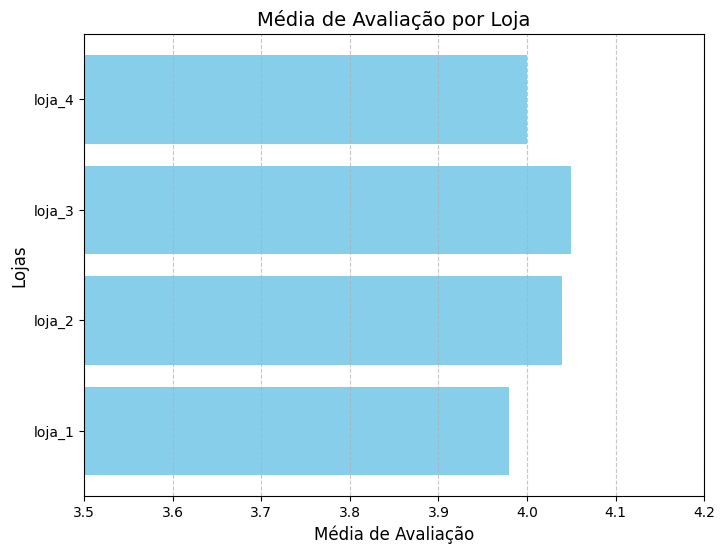

In [78]:
# Extraindo os nomes das lojas e as médias de avaliação
nomes_lojas = [loja['loja'] for loja in lista_avaliacoes]
medias_avaliacoes = [loja['media'] for loja in lista_avaliacoes]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nomes_lojas, medias_avaliacoes, color='skyblue')
plt.title('Média de Avaliação por Loja', fontsize=14)
plt.xlabel('Média de Avaliação', fontsize=12)
plt.ylabel('Lojas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(3.5, 4.2)  # Ajuste do limite do eixo x para melhor visualização
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [61]:
def mais_menos_vendidos(lista: list):

    vendidos_por_loja = []

    for loja in lista:

        loja_str, loja_df = loja

        vendas = list(loja_df['Produto'])
        produtos = set(vendas)

        lista_vendidos = []

        for produto in produtos:    
            qtd = vendas.count(produto)

            lista_vendidos.append((produto, qtd))


        lista_vendidos.sort(key=lambda qtd : qtd[1], reverse=True)
        mais_vendido = lista_vendidos[0]
        menos_vendido = lista_vendidos[-1]

        loja_dict = {
            'loja': loja_str,
            'mais_vendido': {
                'produto': mais_vendido[0],
                'quantidade': mais_vendido[1]
            },
            'menos_vendido': {
                'produto': menos_vendido[0],
                'quantidade': menos_vendido[1]
            }
        }
        
        vendidos_por_loja.append(loja_dict)
    
    return vendidos_por_loja

lista_mais_menos_vendidos = mais_menos_vendidos(dados_lojas)
print(lista_mais_menos_vendidos)


[{'loja': 'loja_1', 'mais_vendido': {'produto': 'Micro-ondas', 'quantidade': 60}, 'menos_vendido': {'produto': 'Celular ABXY', 'quantidade': 33}}, {'loja': 'loja_2', 'mais_vendido': {'produto': 'Iniciando em programação', 'quantidade': 65}, 'menos_vendido': {'produto': 'Jogo de tabuleiro', 'quantidade': 32}}, {'loja': 'loja_3', 'mais_vendido': {'produto': 'Kit banquetas', 'quantidade': 57}, 'menos_vendido': {'produto': 'Blocos de montar', 'quantidade': 35}}, {'loja': 'loja_4', 'mais_vendido': {'produto': 'Cama box', 'quantidade': 62}, 'menos_vendido': {'produto': 'Guitarra', 'quantidade': 33}}]


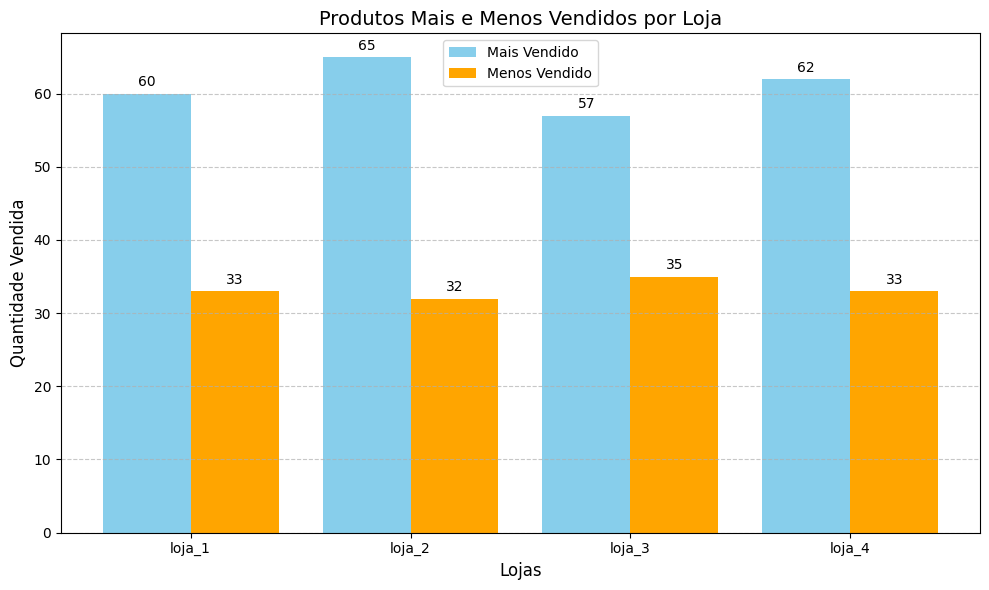

In [ ]:
nomes_lojas = [loja['loja'] for loja in lista_mais_menos_vendidos]
mais_vendidos = [loja['mais_vendido']['quantidade'] for loja in lista_mais_menos_vendidos]
menos_vendidos = [loja['menos_vendido']['quantidade'] for loja in lista_mais_menos_vendidos]

x = range(len(nomes_lojas)) 

plt.figure(figsize=(10, 6))
bar_width = 0.4

bars1 = plt.bar(x, mais_vendidos, width=bar_width, label='Mais Vendido', color='skyblue')

bars2 = plt.bar([pos + bar_width for pos in x], menos_vendidos, width=bar_width, label='Menos Vendido', color='orange')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(bar.get_height()), ha='center', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(bar.get_height()), ha='center', fontsize=10)

plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks([pos + bar_width / 2 for pos in x], nomes_lojas, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [82]:
def media_frete(df: pd.DataFrame):
    
    lista_fretes = list(df['Frete'])
    media = sum(lista_fretes) / len(lista_fretes)

    return round(media, 2)


def fretes_lojas(lista: list):

    lista_frete_medio = []

    for loja in lista:
        loja_str, loja_df = loja

        media = media_frete(loja_df)
        
        lista_frete_medio.append({'loja': loja_str, 'frete': media})

    return lista_frete_medio

lista_frete_medio = fretes_lojas(dados_lojas)

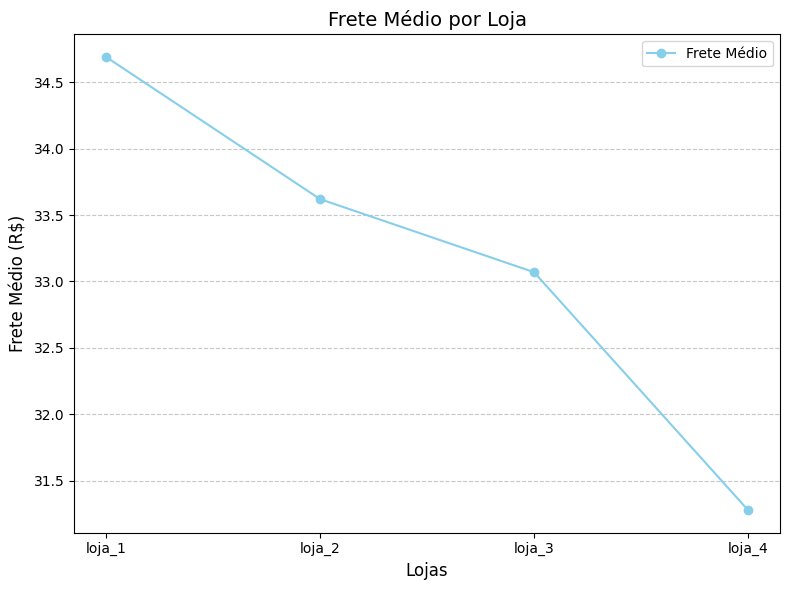

In [ ]:
nomes_lojas = [loja['loja'] for loja in lista_frete_medio]
fretes_medios = [loja['frete'] for loja in lista_frete_medio]

plt.figure(figsize=(8, 6))
plt.plot(nomes_lojas, fretes_medios, marker='o', linestyle='-', color='skyblue', label='Frete Médio')
plt.title('Frete Médio por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()